In [ ]:
Câu 1

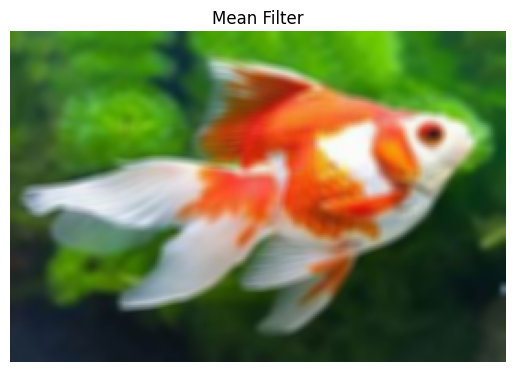

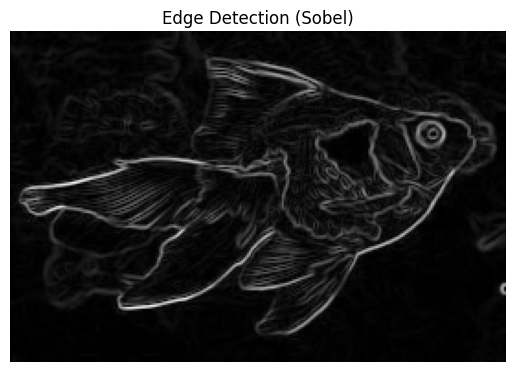

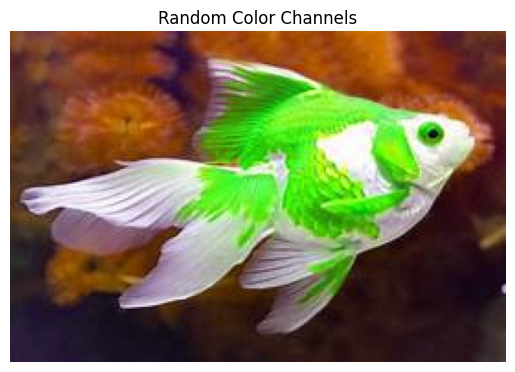

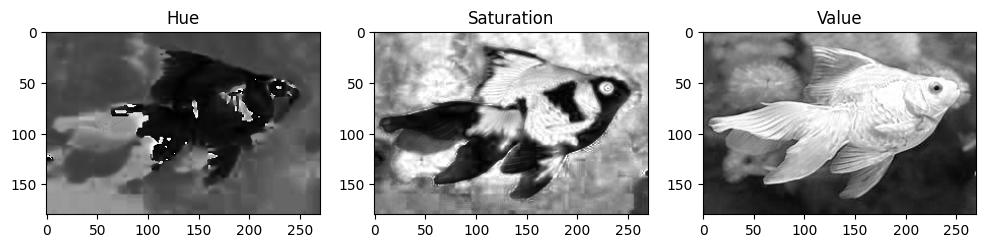

In [5]:

import numpy as np
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh gốc (BGR)
img = cv2.imread('a.jpg')

# Kiểm tra nếu ảnh không tồn tại
if img is None:
    raise FileNotFoundError("Không tìm thấy file 'a.jpg' trong thư mục hiện tại.")


#Mean Filter
# Áp dụng lọc trung bình với kernel 5x5
mean_filtered = cv2.blur(img, (5, 5))

# Hiển thị kết quả
plt.imshow(cv2.cvtColor(mean_filtered, cv2.COLOR_BGR2RGB))
plt.title('Mean Filter')
plt.axis('off')
plt.show()


#Filter xác định biên
# Chuyển ảnh sang grayscale để tìm biên
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Tính đạo hàm theo X và Y (Sobel)
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Tổng hợp biên
sobel = cv2.magnitude(sobel_x, sobel_y)
sobel = np.uint8(sobel / np.max(sobel) * 255)

# Hiển thị ảnh biên
plt.imshow(sobel, cmap='gray')
plt.title('Edge Detection (Sobel)')
plt.axis('off')
plt.show()

#Đổi kênh màu RGB ngẫu nhiên
# Chuyển từ BGR sang RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Tạo thứ tự ngẫu nhiên các kênh màu (0,1,2)
channels = [0, 1, 2]
np.random.shuffle(channels)

# Thay đổi trật tự kênh màu
random_color_img = img_rgb[:, :, channels]

# Lưu ảnh kết quả
cv2.imwrite('a_random_color.jpg', cv2.cvtColor(random_color_img, cv2.COLOR_RGB2BGR))

# Hiển thị
plt.imshow(random_color_img)
plt.title('Random Color Channels')
plt.axis('off')
plt.show()

#Chuyển sang HSV và tách Hue, Saturation, Value
# Chuyển sang HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Tách các kênh
h, s, v = cv2.split(hsv)

# Lưu các kênh thành ảnh grayscale
cv2.imwrite('a_hue.jpg', h)
cv2.imwrite('a_saturation.jpg', s)
cv2.imwrite('a_value.jpg', v)

# Hiển thị cả ba kênh
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(h, cmap='gray')
plt.title('Hue')

plt.subplot(1,3,2)
plt.imshow(s, cmap='gray')
plt.title('Saturation')

plt.subplot(1,3,3)
plt.imshow(v, cmap='gray')
plt.title('Value')
plt.show()




Câu 2

Nhấn phím:
I - Inverse | G - Gamma | L - Log | H - Histogram Eq | C - Contrast Stretch | A - Adaptive Histogram Eq
Nhấn ESC để thoát
Đang áp dụng: inverse


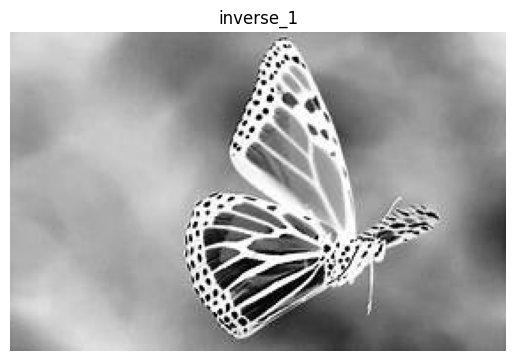

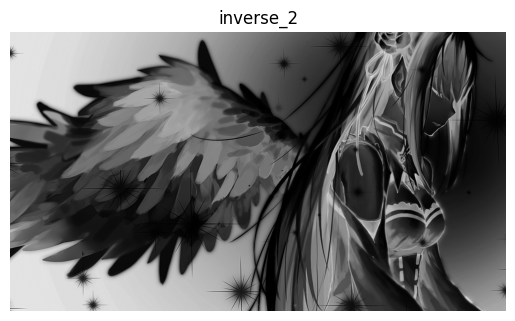

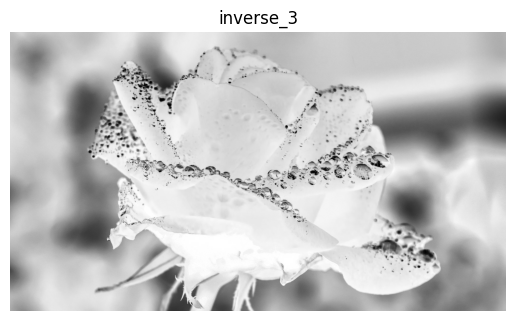

Đang áp dụng: gamma
Gamma: 1.42


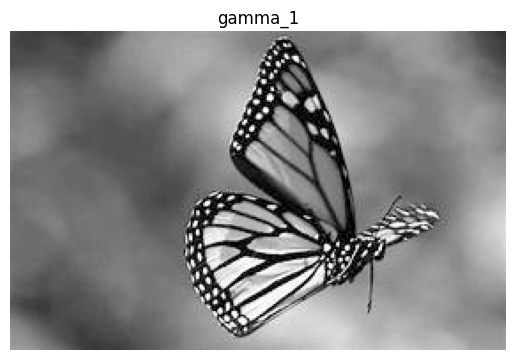

Gamma: 1.75


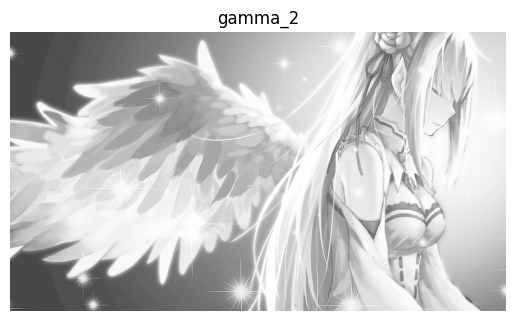

Gamma: 1.87


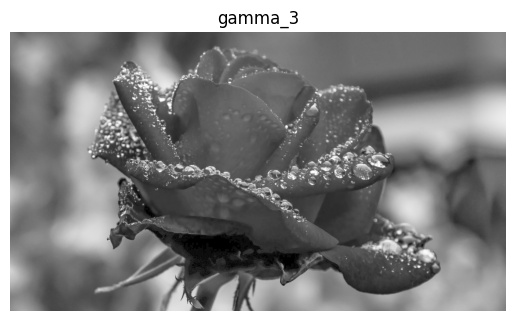

Đang áp dụng: log
Log constant: 3.44


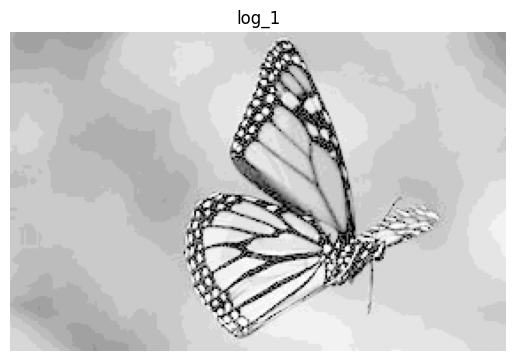

Log constant: 4.38


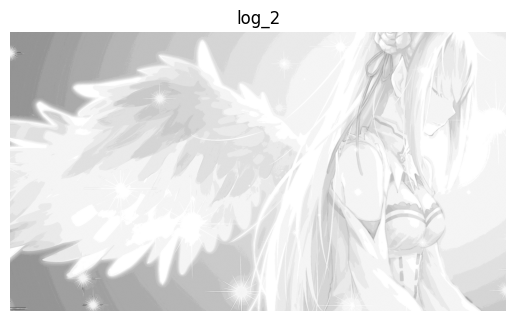

Log constant: 2.15


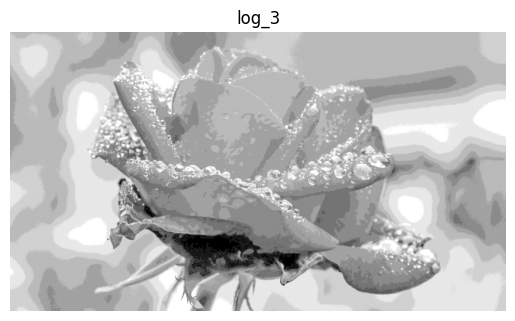

Đang áp dụng: hist


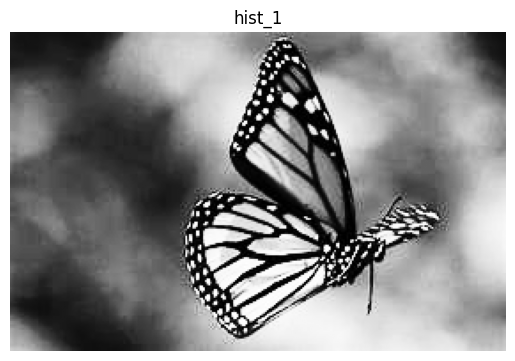

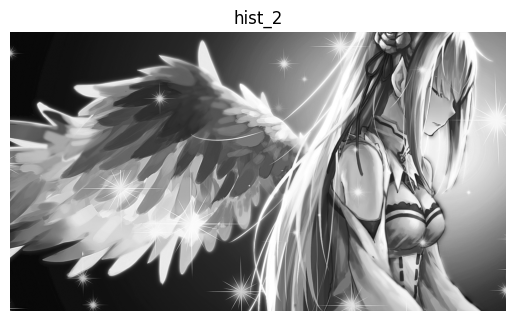

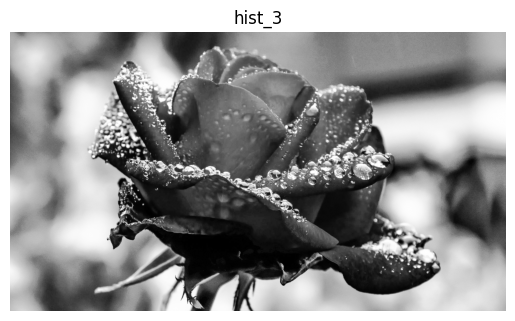

Đang áp dụng: contrast
Contrast range: 59 to 156


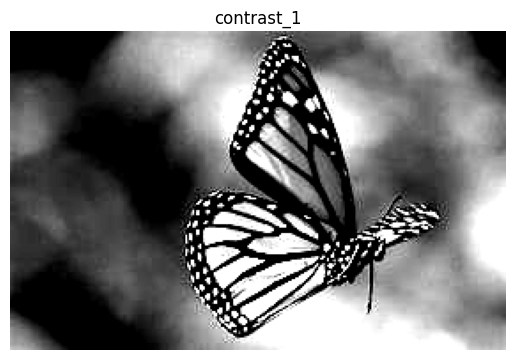

Contrast range: 1 to 203


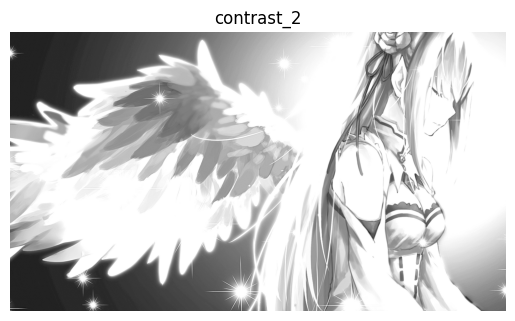

Contrast range: 38 to 194


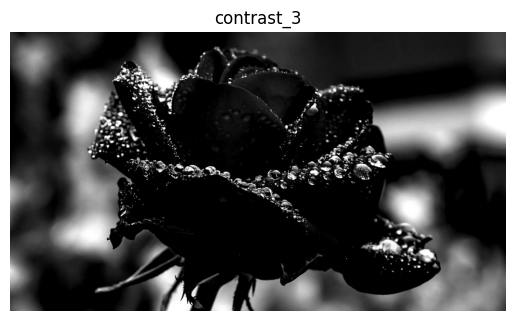

Đang áp dụng: adaptive


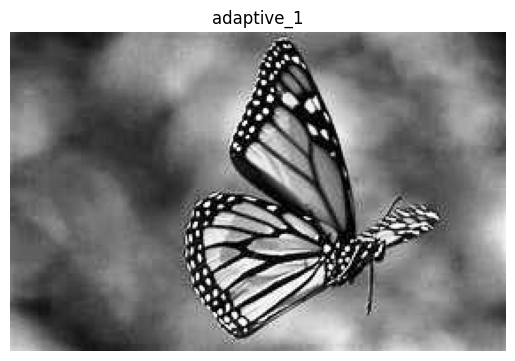

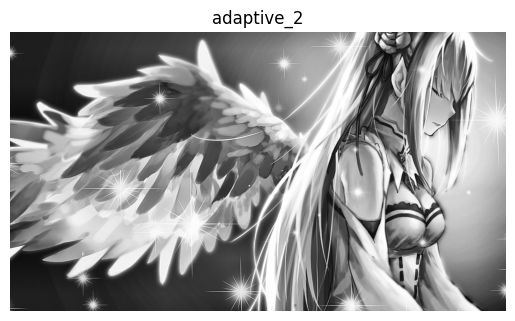

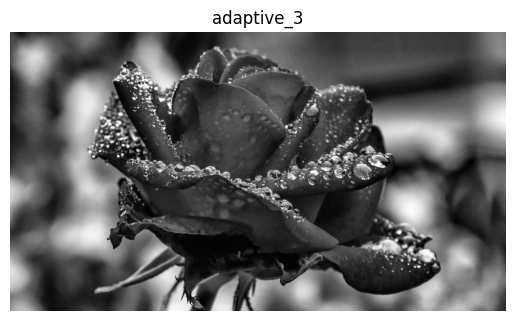

Phím không hợp lệ.
Phím không hợp lệ.
Phím không hợp lệ.
Phím không hợp lệ.
Phím không hợp lệ.
Phím không hợp lệ.
Phím không hợp lệ.
Phím không hợp lệ.
Phím không hợp lệ.
Phím không hợp lệ.
Phím không hợp lệ.


error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [8]:
import cv2
import numpy as np
import random
import os

# Load ảnh
image_paths = ["image1.jpg", "image2.jpg", "image3.jpg"]
images = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in image_paths]

# Đảm bảo ảnh tồn tại
for i, img in enumerate(images):
    if img is None:
        print(f"Không tìm thấy {image_paths[i]}")
        exit()

# 1. Các hàm xử lý
def inverse(img):
    return 255 - img

def gamma_correction(img):
    gamma = round(random.uniform(0.5, 2.0), 2)
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in range(256)]).astype("uint8")
    print(f"Gamma: {gamma}")
    return cv2.LUT(img, table)

def log_transform(img):
    c = round(random.uniform(1.0, 5.0), 2)
    img_float = img.astype(np.float32)
    log_img = c * np.log1p(img_float)
    log_img = np.clip(log_img, 0, 255).astype(np.uint8)
    print(f"Log constant: {c}")
    return log_img

def hist_equalization(img):
    return cv2.equalizeHist(img)

def contrast_stretching(img):
    r1 = random.randint(0, 100)
    r2 = random.randint(155, 255)
    s1, s2 = 0, 255
    stretched = np.interp(img, (r1, r2), (s1, s2)).astype(np.uint8)
    print(f"Contrast range: {r1} to {r2}")
    return stretched

def adaptive_hist_equalization(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return clahe.apply(img)

# 2. Từ phím đến hàm
transformations = {
    ord('I'): ('inverse', inverse),
    ord('G'): ('gamma', gamma_correction),
    ord('L'): ('log', log_transform),
    ord('H'): ('hist', hist_equalization),
    ord('C'): ('contrast', contrast_stretching),
    ord('A'): ('adaptive', adaptive_hist_equalization)
}

# 3. Menu lặp
print("Nhấn phím:")
print("I - Inverse | G - Gamma | L - Log | H - Histogram Eq | C - Contrast Stretch | A - Adaptive Histogram Eq")
print("Nhấn ESC để thoát")

while True:
    key_input = input("Nhập phím I/G/L/H/C/A (hoặc Q để thoát): ").upper()
    if key_input == 'Q':
        break
    key_map = {
        'I': 'inverse',
        'G': 'gamma',
        'L': 'log',
        'H': 'hist',
        'C': 'contrast',
        'A': 'adaptive'
    }
    if key_input in key_map:
        name = key_map[key_input]
        func = transformations[ord(key_input)][1]
        print(f"Đang áp dụng: {name}")
        for idx, img in enumerate(images, 1):
            output = func(img)
            filename = f"output_{name}_{idx}.jpg"
            cv2.imwrite(filename, output)
            # Dùng matplotlib để hiển thị ảnh trong notebook
            plt.imshow(output, cmap='gray')
            plt.title(f"{name}_{idx}")
            plt.axis('off')
            plt.show()
    else:
        print("Phím không hợp lệ.")


cv2.destroyAllWindows()


Câu 3

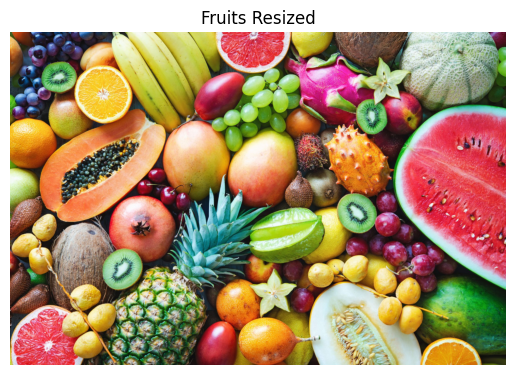

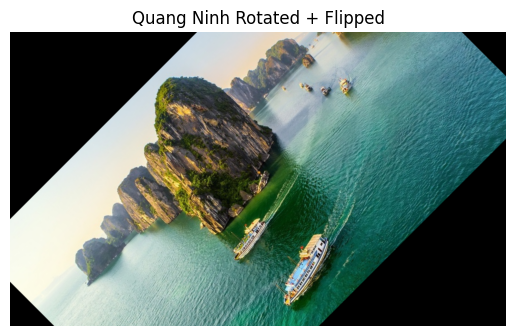

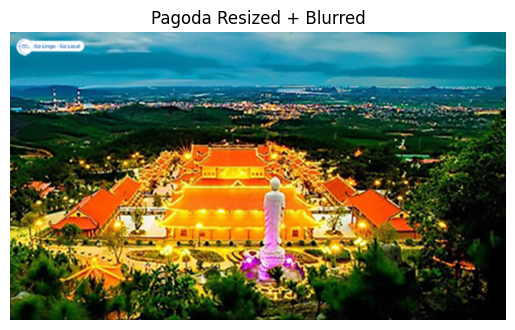

Áp dụng công thức tuyến tính với alpha = 1.26, beta = 44


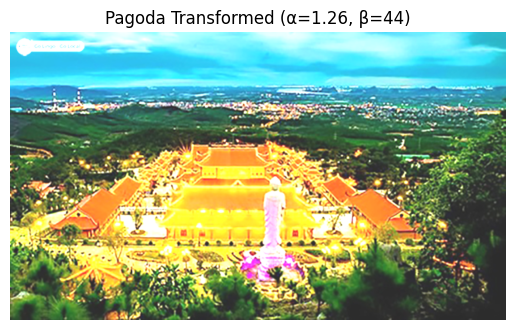

In [16]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Hàm hiển thị ảnh với matplotlib
def show_image(img, title='Image'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. Tăng kích thước ảnh colorful-ripe-tropical-fruits.jpg thêm 30 pixel mỗi chiều
img1 = cv2.imread('colorful-ripe-tropical-fruits.jpg')
h1, w1 = img1.shape[:2]
resized_img1 = cv2.resize(img1, (w1 + 30, h1 + 30))
cv2.imwrite('output_fruits_resized.jpg', resized_img1)
show_image(resized_img1, 'Fruits Resized')

# 2. Xoay ảnh quang-ninh.jpg 45 độ theo chiều kim đồng hồ và lật ngang
img2 = cv2.imread('quang_ninh.jpg')
h2, w2 = img2.shape[:2]
center = (w2 // 2, h2 // 2)
rotate_matrix = cv2.getRotationMatrix2D(center, -45, 1.0)  # -45 độ là chiều kim đồng hồ
rotated_img2 = cv2.warpAffine(img2, rotate_matrix, (w2, h2))
flipped_img2 = cv2.flip(rotated_img2, 1)  # Lật ngang
cv2.imwrite('output_quangninh_rotated_flipped.jpg', flipped_img2)
show_image(flipped_img2, 'Quang Ninh Rotated + Flipped')

# 3. Phóng to ảnh pagoda.jpg 5 lần và làm mờ Gaussian
img3 = cv2.imread('pagoda.jpg')
resized_img3 = cv2.resize(img3, None, fx=5.0, fy=5.0, interpolation=cv2.INTER_LINEAR)
blurred_img3 = cv2.GaussianBlur(resized_img3, (7, 7), 0)
cv2.imwrite('output_pagoda_blurred.jpg', blurred_img3)
show_image(blurred_img3, 'Pagoda Resized + Blurred')

# 4. Áp dụng công thức tuyến tính với alpha và beta ngẫu nhiên
alpha = round(random.uniform(0.5, 2.0), 2)
beta = random.randint(-50, 50)
print(f"Áp dụng công thức tuyến tính với alpha = {alpha}, beta = {beta}")

# Áp dụng công thức cho ảnh pagoda đã phóng to
linear_transformed = cv2.convertScaleAbs(resized_img3, alpha=alpha, beta=beta)
cv2.imwrite('output_pagoda_transformed.jpg', linear_transformed)
show_image(linear_transformed, f'Pagoda Transformed (α={alpha}, β={beta})')
